## Trabalho Final 6IA - Python para IA



### **Instalando/Importando Pacotes**

In [1]:
!pip install altair

In [0]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

## Exercício 1
**Leia o arquivo lemonades.csv usando pandas**

In [3]:
#Lendo arquivo no Google Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  

lemonades = pd.read_csv('Lemonades.csv', sep=';')
lemonades.head()

Saving Lemonades.csv to Lemonades (7).csv
User uploaded file "Lemonades.csv" with length 1163 bytes


,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25
3,07/04/2016,Beach,134,99,76,98.0,0.25
4,07/05/2016,Beach,159,118,78,135.0,0.25


## Exercício 2
**Retorne as informações sobre as colunas e as principais estatísticas
sobre o dataset.**

In [4]:
lemonades.describe()

,Lemon,Orange,Temperature,Leaflets,Price
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354687
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


In [5]:
lemonades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
Date           31 non-null object
Location       32 non-null object
Lemon          32 non-null int64
Orange         32 non-null int64
Temperature    32 non-null int64
Leaflets       31 non-null float64
Price          32 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.8+ KB


In [6]:
lemonades.dtypes

Date            object
Location        object
Lemon            int64
Orange           int64
Temperature      int64
Leaflets       float64
Price          float64
dtype: object

In [0]:
# Convertendo Date para o formato de DateTime
lemonades['Date'] = pd.to_datetime(lemonades['Date'], format='%m/%d/%Y')

In [8]:
lemonades.dtypes

Date           datetime64[ns]
Location               object
Lemon                   int64
Orange                  int64
Temperature             int64
Leaflets              float64
Price                 float64
dtype: object

## Exercício 3
**Realize a limpeza do dataset:**  
1.   Verifique se existe valores nulos  
2.   Verifique e remova, se existir, linhas duplicadas 
3.   Trate os elementos faltantes (interpolação (data) e media)



In [9]:
lemonades.isnull().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

In [10]:
lemonades.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

In [0]:
lemonades.drop_duplicates(inplace=True)

In [12]:
lemonades = lemonades.reset_index(drop=True)
lemonades.head(10)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-07,Beach,143,101,81,135.0,0.25
7,NaT,Beach,123,86,82,113.0,0.25
8,2016-07-09,Beach,134,95,80,126.0,0.25
9,2016-07-10,Beach,140,98,82,131.0,0.25


In [0]:
lemonades['Leaflets'] = lemonades['Leaflets'].fillna(lemonades['Leaflets'].mean())

In [14]:
lemonades.isnull().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       0
Price          0
dtype: int64

In [15]:
tmp = lemonades['Date'].apply(lambda t: (t-datetime(1970,1,1)).total_seconds())
tmp.interpolate(inplace=True) 
lemonades['Date'] = pd.to_datetime(tmp, unit='s') 
lemonades['Date'] = lemonades['Date'].apply(lambda t: t.date())
lemonades['Date'] = pd.to_datetime(lemonades['Date'], format='%Y-%m-%d')
lemonades.head(10)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-07,Beach,143,101,81,135.0,0.25
7,2016-07-08,Beach,123,86,82,113.0,0.25
8,2016-07-09,Beach,134,95,80,126.0,0.25
9,2016-07-10,Beach,140,98,82,131.0,0.25


# Exercício 4
**Adicione uma coluna chamada "Sales" que contém o total de
vendas de limão e laranja**

In [16]:
lemonades['Sales'] = lemonades['Orange'] + lemonades['Lemon']
lemonades.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
0,2016-07-01,Park,97,67,70,90.0,0.25,164
1,2016-07-02,Park,98,67,72,90.0,0.25,165
2,2016-07-03,Park,110,77,71,104.0,0.25,187
3,2016-07-04,Beach,134,99,76,98.0,0.25,233
4,2016-07-05,Beach,159,118,78,135.0,0.25,277


# Exercício 5
**Adicione uma coluna chamada "Revenue" que calcula o lucro
(venda*preço)**

In [17]:
lemonades['Revenue'] = lemonades['Sales'] * lemonades['Price']
lemonades.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
1,2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2,2016-07-03,Park,110,77,71,104.0,0.25,187,46.75
3,2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25
4,2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25


# Exercício 6
**Escreva uma função que retorne o lucro total**


In [18]:
def get_total_profit():
    return lemonades['Revenue'].sum()

get_total_profit()

2138.0

# Exercício 7

**Escreva uma função que receba dois parâmetros, dataset e
temp(int). Se temp for 1, ele retorna a máxima temperatura
observada no conjunto de dados; se 0, retorna a média do período
observado; se -1, retorna a temperatura mínima.**

In [19]:
def process_temp(dataset, temp):
    if temp == 1:
        return dataset['Temperature'].max()
    elif temp == 0:
        return dataset['Temperature'].mean()
    elif temp == -1:
        return dataset['Temperature'].min()
    else:
        raise ValueError(f"Invalid Temp:{temp}")

print(f'Max: {process_temp(lemonades, 1)}')
print(f'Mean: {process_temp(lemonades, 0)}')
print(f'Min: {process_temp(lemonades, -1)}')

Max: 84
Mean: 78.87096774193549
Min: 70


# Exercício 8

**Escreva uma função que receba dois parâmetros (dataset,
localização) e retorne o dataset com o preço do limão e laranja
ajustados em 15% se a localização for 'Park' ou ajustados em 10% se
a localização for 'Beach'.**




In [20]:
def adjust_price(row, local):
    prices = {
        'Park': 0.15,
        'Beach': 0.10
    }
    if row['Location'] == local:
        return row['Price'] * (1 + prices[local])
    else:
        return row['Price']

def apply_price(dataset, local):
    dataset['Price'] = dataset.apply(lambda x: adjust_price(x, local), axis=1)
    return dataset

lemonades = apply_price(lemonades, 'Beach')
lemonades = apply_price(lemonades, 'Park')
lemonades.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,2016-07-01,Park,97,67,70,90.0,0.2875,164,41.00
1,2016-07-02,Park,98,67,72,90.0,0.2875,165,41.25
2,2016-07-03,Park,110,77,71,104.0,0.2875,187,46.75
3,2016-07-04,Beach,134,99,76,98.0,0.2750,233,58.25
4,2016-07-05,Beach,159,118,78,135.0,0.2750,277,69.25


# Exercício 9

**Escreva uma função que receba o dataset como parâmetro e
retorne o dataset com uma coluna a mais que mostre o rank de
temperatura. O dataset retornado precisa estar ordenado de
acordo com rank (descendente)**


In [21]:
def set_rank(dataset):
    dataset['Rank'] = dataset['Temperature'].rank(ascending=True)
    dataset = dataset.sort_values(by='Rank', ascending=False)
    return dataset

lemonades = set_rank(lemonades)
lemonades.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,Rank
24,2016-07-25,Park,156,113,84,135.0,0.5750,269,134.50,30.5
11,2016-07-12,Beach,130,95,84,99.0,0.2750,225,56.25,30.5
25,2016-07-26,Park,176,129,83,158.0,0.4025,305,106.75,28.5
10,2016-07-11,Beach,162,120,83,135.0,0.2750,282,70.50,28.5
9,2016-07-10,Beach,140,98,82,131.0,0.2750,238,59.50,24.0


# Exercício 10
**Imprima um gráfico de linha que retorne o lucro ao longo do tempo**

In [22]:
alt.Chart(lemonades).mark_line().encode(
    x= alt.X('Date', axis=alt.Axis(title='Tempo')),
    y= alt.Y('Revenue', axis=alt.Axis(title='Lucro'))
).properties(
    title="Lucro sobre o tempo"
)

alt.Chart(...)

**Observação:** Nesse gráfico podemos observar que existem períodos de grande alta e de grande baixa, que podem representar uma sazonalidade, específico de pequenos períodos que podem ser analisados mais de perto.

# Exercício 11

**Crie um scatter-plot leaflets x sales. Existe alguma correlação entre
os dados? (Use a correlação de Pearson e explique o significado do
valor obtido por ela)**


In [23]:
alt.Chart(lemonades).mark_point(
    color='blue'
).encode(
    x= alt.X('Leaflets', axis=alt.Axis(title='Leaflets')),
    y= alt.Y('Sales', axis=alt.Axis(title='Sales'))
).properties(
    title="Correlação Sales x Leaflets"
)

alt.Chart(...)

**Observação:** Existe correlação!  
A correlação apresentada no gráfico é quanto maior for as entregas de folhetos, maior serão as vendas.   
Essa correlação mostra que a ação é eficiente para as vendas.

# Exercício 12

**Crie um histograma com 10 bins que mostre o lucro (revenue)**

In [24]:
alt.Chart(lemonades).mark_bar().encode(
    x= alt.X('Revenue', axis=alt.Axis(title='Revenue'), bin=alt.Bin(maxbins=10)),
    y= 'count()'
).properties(
    title="Correlação Sales x Leaflets"
)

alt.Chart(...)

# Exercício 13

**Crie um gráfico de linha que mostre o lucro por tipo de fruta ao
longo do tempo.**

In [25]:
lemonades['LemonRevenue'] = lemonades['Lemon'] * lemonades['Price']
lemonades['OrangeRevenue'] = lemonades['Orange'] * lemonades['Price']
lemonades.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,Rank,LemonRevenue,OrangeRevenue
24,2016-07-25,Park,156,113,84,135.0,0.5750,269,134.50,30.5,89.70,64.9750
11,2016-07-12,Beach,130,95,84,99.0,0.2750,225,56.25,30.5,35.75,26.1250
25,2016-07-26,Park,176,129,83,158.0,0.4025,305,106.75,28.5,70.84,51.9225
10,2016-07-11,Beach,162,120,83,135.0,0.2750,282,70.50,28.5,44.55,33.0000
9,2016-07-10,Beach,140,98,82,131.0,0.2750,238,59.50,24.0,38.50,26.9500


In [26]:
base = alt.Chart(lemonades).encode(x='Date')

orange =  base.mark_line(color='orange').encode(
    y='OrangeRevenue'
)

lemon =  base.mark_line(color='green').encode(
    y='LemonRevenue'
)

(orange + lemon).properties(
    title="Lucro de Orange sobre o tempo"
)

alt.LayerChart(...)

**Observação:** Podemos observar que a venda de limão é maior que a de laranja, mas que a relação de venda entre as frutas são proporcionais, ou seja, quando a venda de limão aumenta, a venda de laranja aumenta com a mesma proporção.

#Exercício 14
**Ajuste uma Regressão Linear aos dados para predizer vendas
usando cada uma das features abaixo:**


In [27]:
 alt.Chart(lemonades).mark_circle(size=60).encode(
        x='Temperature:Q',
        y='Sales:Q'
    )

alt.Chart(...)

**Observação:** A maior ocorrência de vendas acontece quando a temperatura está próxima dos 80 Graus Fahrenheit (F), valor equivalente a 27 graus Celsius.

**Temperature**

Score: 42.30% 
 Mean Squared Error: 2106.87


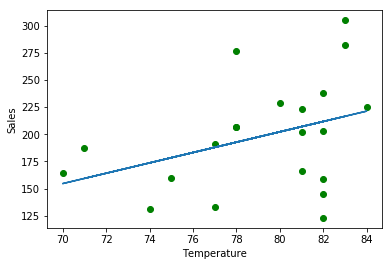

In [28]:
temperature_linearRegression = LinearRegression()
temperature =  np.array(lemonades['Temperature']).reshape(len(lemonades['Temperature']), 1)
sales = np.array(lemonades['Sales']).reshape(len(lemonades['Sales']), 1)

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(temperature, sales, test_size=0.3, random_state=42)
temperature_linearRegression.fit(X_train_temp, y_train_temp)

temperature_predict = temperature_linearRegression.predict(X_train_temp)

temperature_score = temperature_linearRegression.score(X_test_temp, y_test_temp)
temperature_mse = mean_squared_error(temperature_predict, y_train_temp)

print(f'Score: {temperature_score * 100 :.2f}% \n Mean Squared Error: {temperature_mse :.2f}')

plt.scatter(X_train_temp, y_train_temp, c='g')
plt.plot(X_train_temp, temperature_predict)
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.show()

**Leaflets**

Score: 37.49% 
 Mean Squared Error: 416.00


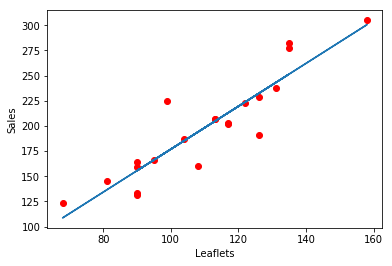

In [29]:
leaflets_linearRegression = LinearRegression()
leaflets =  np.array(lemonades['Leaflets']).reshape(len(lemonades['Leaflets']), 1)
sales = np.array(lemonades['Sales']).reshape(len(lemonades['Sales']), 1)

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(leaflets, sales, test_size=0.3, random_state=42)
leaflets_linearRegression.fit(X_train_temp, y_train_temp)

leaflets_predict = leaflets_linearRegression.predict(X_train_temp)

leaflets_score = leaflets_linearRegression.score(X_test_temp, y_test_temp)
leaflets_mse = mean_squared_error(leaflets_predict, y_train_temp)

print(f'Score: {leaflets_score * 100 :.2f}% \n Mean Squared Error: {leaflets_mse :.2f}')

plt.scatter(X_train_temp, y_train_temp, c='r')
plt.plot(X_train_temp, leaflets_predict)
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.show()

**Price**

Score: -10.96% 
 Mean Squared Error: 2126.00


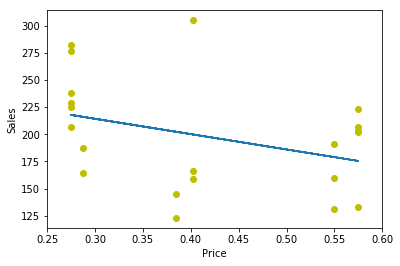

In [30]:
price_linearRegression = LinearRegression()
price = np.array(lemonades['Price']).reshape(len(lemonades['Price']), 1)
sales = np.array(lemonades['Sales']).reshape(len(lemonades['Sales']), 1)

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(price, sales, test_size=0.3, random_state=42)
price_linearRegression.fit(X_train_temp, y_train_temp)

price_predict = price_linearRegression.predict(X_train_temp)

price_score = price_linearRegression.score(X_test_temp, y_test_temp)
price_mse = mean_squared_error(price_predict, y_train_temp)

print(f'Score: {price_score * 100 :.2f}% \n Mean Squared Error: {price_mse :.2f}')

plt.scatter(X_train_temp, y_train_temp, c='y')
plt.plot(X_train_temp, price_predict)
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

# Exercício 15

**Ajuste uma Regressão Linear aos dados para predizer vendas
usando as três features juntas. Comente o resultado obtido.**

In [0]:
feature_col = ['Price','Leaflets','Temperature']
meta_col = ['Sales']

X = lemonades[feature_col].values
y = lemonades[meta_col].values
split_test_size = 0.30

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [33]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = lr_model.predict(X_test)
y_pred

array([157.02064783, 178.97504964, 186.92128821, 179.63088137,
       225.4108586 , 179.72401673, 159.93212138, 182.79886611,
       266.97527837, 241.15157993])

In [35]:
y_test

array([[165],
       [187],
       [184],
       [172],
       [209],
       [172],
       [113],
       [233],
       [244],
       [269]])

In [36]:
mean_squared_error(y_test,y_pred)

654.9986657390332

**Observação:** Foi escolhido preço, folhetos e temperatura como variáveis para predição das vendas pois conforme as análises feitas anteriormente são as variáveis que possuem melhor correlação.   
Dos dados fornecidos, separamos 30% para teste da regressão linear.  
Embora o erro esteja alto, os valores são pouco próximos aos valores reais

# Exercício 16

**Generalize o algoritmo de Regressão Linear implementada em sala
para que ele possa ser usado para regressão multivariada.**

In [0]:
class LinearRegressionGeneralized():
    
    def cost_function(self,X,y,theta):
        m = len(y)
        J = 0 
        J = J + np.power(((X @ theta.T) - y), 2)
        return np.sum(J) / (2 * len(X))

    def gradient_descent(self,X,y,theta,alpha,num_iter):
        m = len(y)
        J_history = np.zeros(num_iter)

        for k in range(num_iter):
          theta = theta - (alpha / len(X)) * np.sum((X @ theta.T - y) * X, axis=0)

          J_history[k] = self.cost_function(X, y, theta)
    
        return theta,J_history

# Exercício 17
**Aplique o algoritmo implementado na questão 16 no conjunto de
dados consumo_cerveja.csv usando as mesmas features para
treinamento.**
1.   Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning.
2.   Prediga o consumo usando seu modelo e o modelo da sklearn.
3.   Calcule o MSE de ambos

In [52]:
#Lendo arquivo no Google Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  
cerveja = pd.read_csv('consumo_cerveja.csv', sep=';')

Saving consumo_cerveja.csv to consumo_cerveja (7).csv
User uploaded file "consumo_cerveja.csv" with length 14436 bytes


In [53]:
cerveja.columns = ['Data','TemperaturaMedia','TemperaturaMinima','TemperaturaMaxima','Precipitacao','FinalDeSemana','ConsumoCerveja']
cerveja.head()

,Data,TemperaturaMedia,TemperaturaMinima,TemperaturaMaxima,Precipitacao,FinalDeSemana,ConsumoCerveja
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [54]:
cerveja.isna().sum()

Data                 0
TemperaturaMedia     0
TemperaturaMinima    0
TemperaturaMaxima    0
Precipitacao         0
FinalDeSemana        0
ConsumoCerveja       0
dtype: int64

In [0]:
feature_col = cerveja[['TemperaturaMedia','TemperaturaMinima','TemperaturaMaxima','Precipitacao','FinalDeSemana']]

ones = np.ones([feature_col.shape[0], 1]) 

x = np.concatenate((ones, feature_col), 1)
y = cerveja.iloc[:, 6:7].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [56]:
alpha = 0.001
iterations = 1500

theta = np.zeros([1,6]).reshape(1, -1) # criacao do theta
theta

array([[0., 0., 0., 0., 0., 0.]])

In [0]:
linear_regression = LinearRegressionGeneralized()

In [58]:
cost = linear_regression.cost_function(x_train, y_train, theta)
print(f'Custo: Dados não-normalizados: {cost}')

Custo: Dados não-normalizados: 325.28813059411766


In [59]:
%time theta_lr, cost_lr = linear_regression.gradient_descent(x_train, y_train, theta, alpha, iterations)

CPU times: user 55.9 ms, sys: 512 µs, total: 56.4 ms
Wall time: 58.3 ms


In [60]:
new_cost = linear_regression.cost_function(x_train, y_train, theta_lr)
print(f'Custo: Dados não-normalizados: {new_cost}')

Custo: Dados não-normalizados: 4.857890772209221


**Scikit Learning**

In [0]:
from sklearn.linear_model import SGDRegressor
gd_reg = SGDRegressor(loss='squared_loss', alpha=alpha, max_iter=iterations, random_state=66)

In [0]:
x = cerveja[['TemperaturaMedia','TemperaturaMinima','TemperaturaMaxima','Precipitacao','FinalDeSemana']]
y = cerveja['ConsumoCerveja']

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=88)

In [64]:
gd_reg.fit(x_train, y_train)
gd_predict = gd_reg.predict(x_test)
gd_reg.score(x_test, y_test)

-1.9878592178784804e+23

In [65]:
mean_squared_error(gd_predict, y_test)

4.083573191717276e+24

**Observação:** Quanto maior a iteração com o alpha 0.01 o modelo implementado manualmente tende a se aproximar do resultado obtido pelo scikit learn. Porém, com um custo muito maior de processamento. 